In [96]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.constants import G, c
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u

In [97]:
# Constants:

H_0 = 70 # Hubble constant in SI
c = 3e8 # Speed of light in m/s
G = 6.67430e-11 # Gravitational constant in pc kg^-1 (m/s)^2
q0=-0.534  # Deceleration parameter (assumed from Planck fit KEEP it as it is)

In [98]:
df = pd.read_csv(r"D:\code\python\Skyserver_SQL6_16_2025 1_48_48 PM copy.csv") # Download the data as instructed in the pdf


In [99]:
df

,objid,ra,dec,photoz,photozerr,specz,speczerr,proj_sep,umag,umagerr,gmag,gmagerr,rmag,rmagerr,obj_type
0,1237671768542478711,257.82458,64.133257,0.079193,0.022867,0.082447,0.000017,8.347733,18.96488,0.043377,17.49815,0.005672,16.75003,0.004708,3
1,1237671768542478711,257.82458,64.133257,0.079193,0.022867,0.082466,0.000014,8.347733,18.96488,0.043377,17.49815,0.005672,16.75003,0.004708,3
2,1237671768542478713,257.83332,64.126043,0.091507,0.014511,0.081218,0.000021,8.011259,20.22848,0.072019,18.38334,0.007763,17.46793,0.005828,3
3,1237671768542544090,257.85137,64.173247,0.081102,0.009898,0.079561,0.000022,8.739276,19.21829,0.050135,17.18970,0.004936,16.22043,0.003769,3
4,1237671768542544090,257.85137,64.173247,0.081102,0.009898,0.079568,0.000019,8.739276,19.21829,0.050135,17.18970,0.004936,16.22043,0.003769,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,1237671939804627464,258.44994,64.025909,0.081894,0.013624,0.071802,0.000025,9.316140,20.05525,0.065651,18.35306,0.008030,17.51662,0.005923,3
135,1237671939804627483,258.43205,64.123685,0.077184,0.010523,0.080790,0.000025,8.146154,20.08116,0.082063,18.15476,0.007831,17.27835,0.005706,3
136,1237671939804627518,258.46676,64.119499,0.088762,0.016934,0.082876,0.000006,8.986029,18.92277,0.036291,17.83406,0.006814,17.36895,0.006322,3
137,1237671939804627535,258.48871,64.111343,0.079721,0.009565,0.080899,0.000029,9.483374,19.85553,0.067158,17.81776,0.006378,16.88524,0.004627,3


In [100]:
# Calculating the average specz for each id:

averaged_df = df.groupby('objid').agg({'specz': 'mean', 'ra': 'first', 'dec': 'first', 'proj_sep': 'first' }).reset_index()
averaged_df.describe()['specz']

count    92.000000
mean      0.080838
std       0.008578
min       0.069976
25%       0.077224
50%       0.080961
75%       0.082797
max       0.150886
Name: specz, dtype: float64

In [101]:
# 1. Calculate mean
mean = df['specz'].mean()

# 2. Calculate standard deviation
std = df['specz'].std()

# 3. Calculate the limits for the redshift values that are within 3 standard deviations
lower_limit = mean - 3 * std
upper_limit = mean + 3 * std

# Print the results
print(f"Mean Redshift: {mean:.6f}")
print(f"Standard Deviation: {std:6f}")
print(f"Lower Limit (mean - 3σ): {lower_limit:.6f}")
print(f"Upper Limit (mean + 3σ): {upper_limit:.6f}")

Mean Redshift: 0.081047
Standard Deviation: 0.009498
Lower Limit (mean - 3σ): 0.052554
Upper Limit (mean + 3σ): 0.109540


In [102]:
print("Default figsize:", plt.rcParams["figure.figsize"])

Default figsize: [6.4, 4.8]


Text(0.5, 0, 'Redshift')

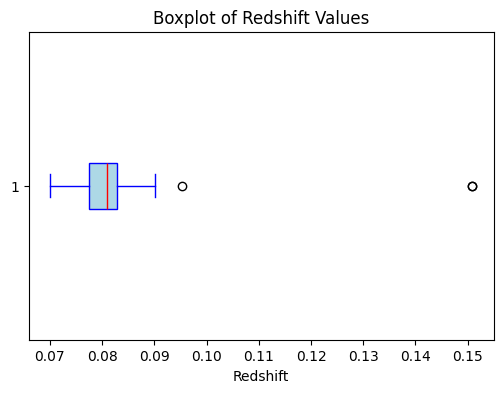

In [103]:
# Plot the dsitribution of redshift as histogram and a boxplot 
plt.figure(figsize=(6,4))
plt.boxplot(df['specz'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))
plt.title('Boxplot of Redshift Values')
plt.xlabel('Redshift')

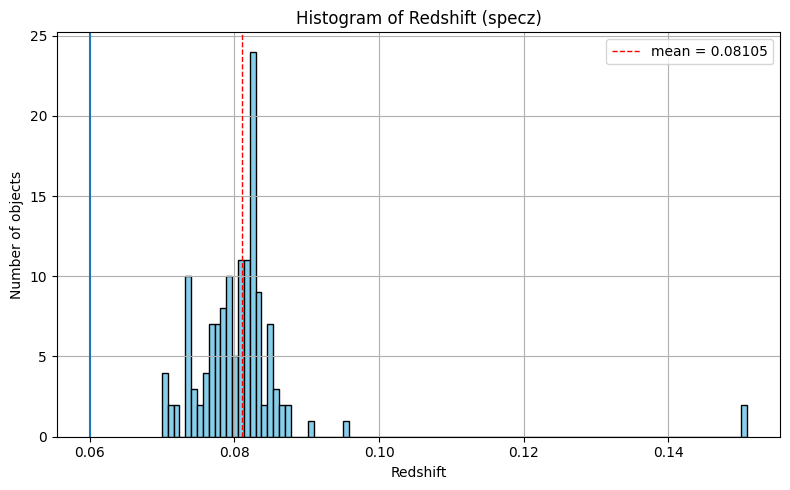

In [104]:
mean_redshift = df['specz'].mean()
plt.figure(figsize=(8,5))
plt.hist(df['specz'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Redshift (specz)')
plt.xlabel('Redshift')
plt.ylabel('Number of objects')
plt.axvline(mean_redshift, color='red', linestyle='--', linewidth=1, label=f'mean = {mean_redshift:.4}')
plt.legend()
plt.axvline(0.06)
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
# Filtering the data based on specz values, used 3 sigma deviation from mean as upper limit.
filtered_df = df[(df['specz'] >= lower_limit) & (df['specz'] <= upper_limit)]
print(f"original data size: {len(df)}")
print(f"Filtered data size (within 3σ): {len(filtered_df)}")

original data size: 139
Filtered data size (within 3σ): 137


In [106]:
z_cluster =df['specz'].mean()
print(f"z_cluster={z_cluster:6f}")
df['velocity']= c*((1+df['specz'])**2-(1+z_cluster)**2)/((1+df['specz'])**2 +(1+ z_cluster)**2)
print(df[['specz','velocity']].head())

z_cluster=0.081047
      specz       velocity
0  0.082447  388361.508314
1  0.082466  393632.841268
2  0.081218   47578.917018
3  0.079561 -412627.060088
4  0.079568 -410779.095990


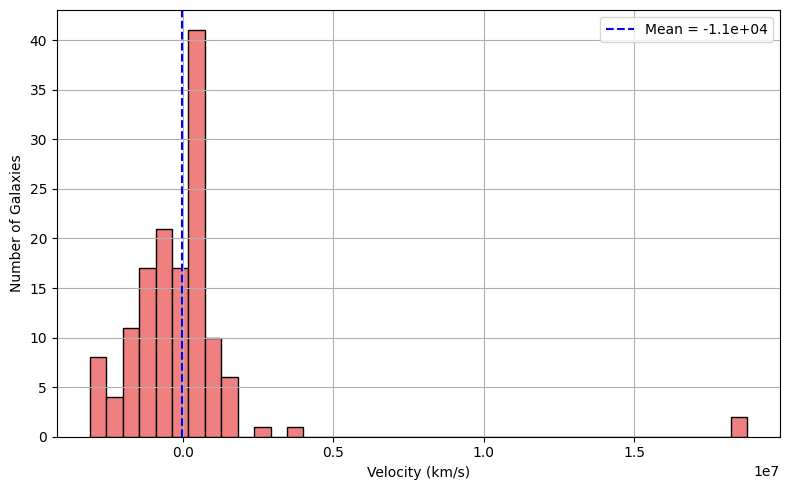

In [107]:
#plot the velocity column created as hist
plt.figure(figsize=(8,5))
plt.hist(df['velocity'], bins=40, color='lightcoral', edgecolor='black')
plt.xlabel('Velocity (km/s)')
plt.ylabel('Number of Galaxies')

mean_velocity = df['velocity'].mean()
plt.axvline(mean_velocity, color='blue', linestyle='--', label=f'Mean = {mean_velocity:.2}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:
cluster_redshift = filtered_df['specz'].mean()
print(f"The value of the cluster redshift: {cluster_redshift:.4}")

The value of the cluster redshift: 0.08003


In [109]:
dispersion_stats = df['velocity'].describe()
print(dispersion_stats)

count    1.390000e+02
mean    -1.147718e+04
std      2.570296e+06
min     -3.088453e+06
25%     -9.980736e+05
50%     -1.386084e+04
75%      4.857054e+05
max      1.876237e+07
Name: velocity, dtype: float64


In [111]:
# Speed of light in km/s
c = 299792.458

# Mean cluster redshift (calculate from data)
cluster_redshift = filtered_df['specz'].mean()

# Compute velocity for each galaxy using relativistic formula
def calc_velocity(z, z_cluster):
    num = (1 + z)**2 - (1 + z_cluster)**2
    denom = (1 + z)**2 + (1 + z_cluster)**2
    return c * num / denom

# Apply formula to each galaxy in the filtered dataset
filtered_df.loc[:, 'velocity'] = filtered_df['specz'].apply(lambda z: calc_velocity(z, cluster_redshift))

# Calculate standard deviation of the velocity dispersion
velocity_dispersion = filtered_df['velocity'].std()

print(f"The characteristic value of velocity dispersion of the cluster along the line of sight = {velocity_dispersion:.2f} km/s")

The characteristic value of velocity dispersion of the cluster along the line of sight = 1202.58 km/s


In [112]:

print(f"The value of the cluster redshift = {cluster_redshift:.4}")
print(f"The characteristic value of velocity dispersion of the cluster along the line of sight = {velocity_dispersion:.4} km/s.")

The value of the cluster redshift = 0.08003
The characteristic value of velocity dispersion of the cluster along the line of sight = 1.203e+03 km/s.


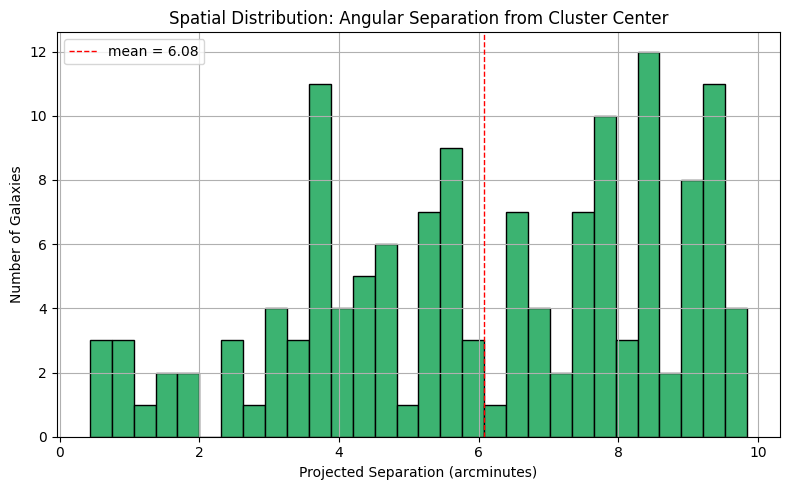

In [113]:
#Plot histogram for proj sep column
mean_sep = df['proj_sep'].mean()
plt.figure(figsize=(8,5))
plt.hist(df['proj_sep'], bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Spatial Distribution: Angular Separation from Cluster Center')
plt.xlabel('Projected Separation (arcminutes)')
plt.ylabel('Number of Galaxies')
plt.axvline(mean_sep, color='red', linestyle='--', linewidth=1, label=f'mean = {mean_sep:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [114]:
max_sep_armin = df['proj_sep'].max()
print(f"Maximum angular extent of the cluster: {max_sep_armin:.2f}")

Maximum angular extent of the cluster: 9.84


In [115]:
z = 0.08105
theta_arcmin = 9.84
theta_rad = (theta_arcmin / 60) * (np.pi / 180)
r = (c * z / H_0) * (1 - (z / 2) * (1 + q0))
DA = r / (1 + z) 
D_phys = DA * theta_rad 
print(f"Co-moving distance (r): {r:.2f} Mpc")
print(f"Angular diameter distance (DA): {DA:.2f} Mpc")
print(f"Angular size: {theta_arcmin} arcmin = {theta_rad:.6f} radians")
print(f"Estimated physical diameter of the cluster: {D_phys:.2f} Mpc")

Co-moving distance (r): 340.56 Mpc
Angular diameter distance (DA): 315.03 Mpc
Angular size: 9.84 arcmin = 0.002862 radians
Estimated physical diameter of the cluster: 0.90 Mpc


In [116]:
sigma_v = velocity_dispersion * 1000   # convert km/s to m/s
R_mpc = D_phys / 2
R_m = R_mpc * 3.086e22                 # convert Mpc to meters (1 Mpc ≈ 3.086e22 m)

G = 6.67430e-11                        # gravitational constant in SI units (m^3 kg^-1 s^-2)

# Dynamical mass in kg
M_dyn_kg = (3 * sigma_v**2 * R_m) / G

# Convert to solar masses
M_dyn = M_dyn_kg / 1.989e30

print(f"Dynamical Mass: {M_dyn:.2e} solar masses")

Dynamical Mass: 4.55e+14 solar masses


In [117]:
# Find the cluster members
cluster_members = df[(df['specz'] >= lower_limit) & (df['specz'] <= upper_limit)]
print(f"Number of cluster members: {len(cluster_members)}")

Number of cluster members: 137


In [118]:
N_galaxies = len(cluster_members)
M_luminous = N_galaxies * 1e11   # M_sun
print(f"Estimated Luminous Mass is {M_luminous:.2e} solar mass")

Estimated Luminous Mass is 1.37e+13 solar mass


In [119]:
mass_ratio = M_dyn / M_luminous
print(f"Mass Ratio (Dynamical / Luminous): {mass_ratio:.2f}")

Mass Ratio (Dynamical / Luminous): 33.19


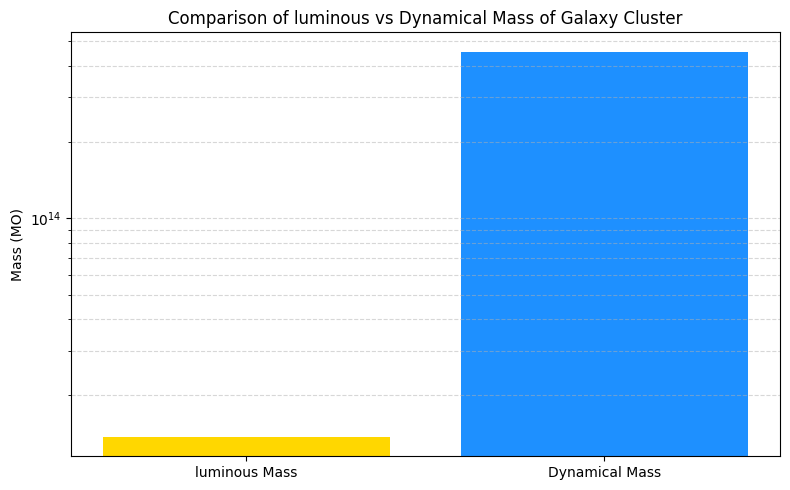

In [120]:
M_dyn = 4.55e+14
M_luminous = 1.37e+13

masses = [M_luminous, M_dyn]
labels = ['luminous Mass', 'Dynamical Mass']
colors = ['gold', 'dodgerblue']

plt.figure(figsize=(8,5))
plt.bar(labels, masses, color=colors)


plt.ylabel('Mass (MO)')
plt.title('Comparison of luminous vs Dynamical Mass of Galaxy Cluster')
plt.yscale('log')
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()